<a href="https://colab.research.google.com/github/eunseochu/OB_12th/blob/main/Basic_classification_Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


### **Import the Fashion MNIST dataset**

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **Explore the data**

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

- There are 60,000 labels in the training set

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- Each label is an integer between 0 and 9

In [7]:
test_images.shape

(10000, 28, 28)

- the test set contains 10,000 images labels

### **Preprocess the data**

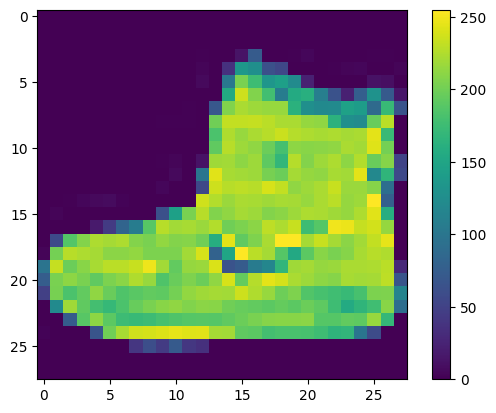

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

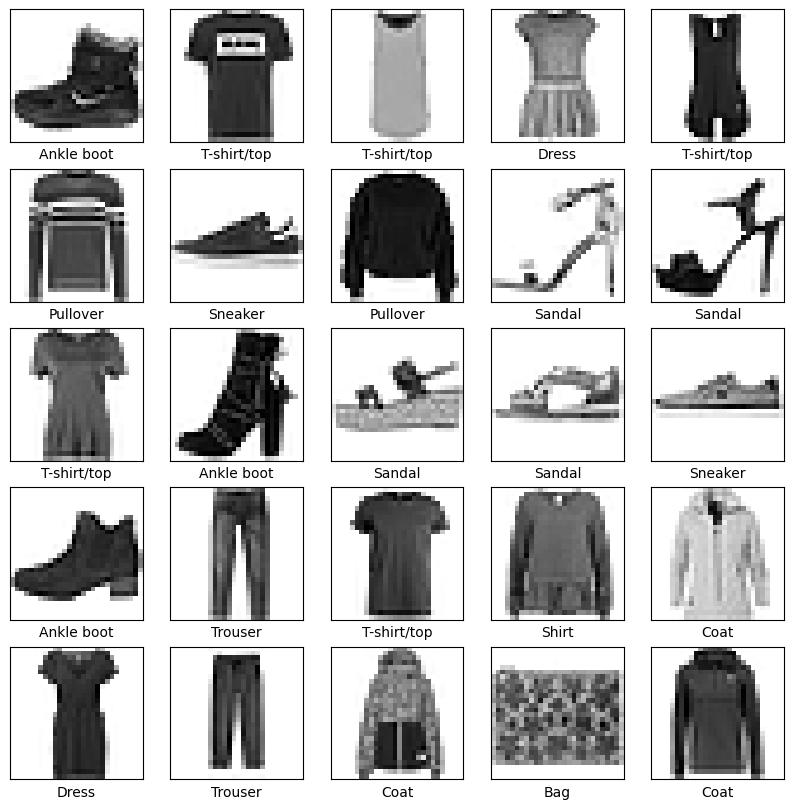

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Build the model**

**Set up the layers**

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### **Compile the model**
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function: This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer: This is how the model is updated based on the data it sees and its loss function.
- Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Train the model**
Training the neural network model requires the following steps:

- Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
- The model learns to associate images and labels.
- You ask the model to make predictions about a test set—in this example, the test_images array.
- Verify that the predictions match the labels from the test_labels array.

**Feed the model**

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4985 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3777 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3381 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3118 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2955 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2804 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2692 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2589 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2488 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

### **Evaluate accuracy**

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3490 - accuracy: 0.8820 - 695ms/epoch - 2ms/step

Test accuracy: 0.8820000290870667


- It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
- This gap between training accuracy and test accuracy represents overfitting. 
- Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 

### **Make predictions**

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [17]:
predictions[0]

array([3.3877672e-07, 5.5586180e-10, 1.9839295e-11, 1.8475121e-11,
       1.1059805e-08, 6.1233749e-04, 6.1548278e-09, 2.6171873e-03,
       2.4758723e-08, 9.9677008e-01], dtype=float32)

- A prediction is an array of 10 numbers. 
- They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

**highest confidence value**

In [18]:
np.argmax(predictions[0])

9

**Examining the test label shows that this classification is correct**

In [19]:
test_labels[0]

9

**Graph this to look at the full set of 10 class predictions**

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Verify predictions**

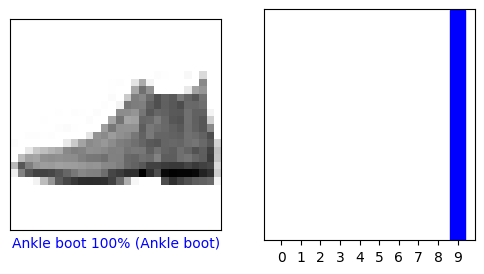

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

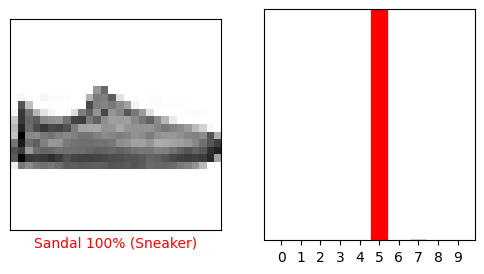

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

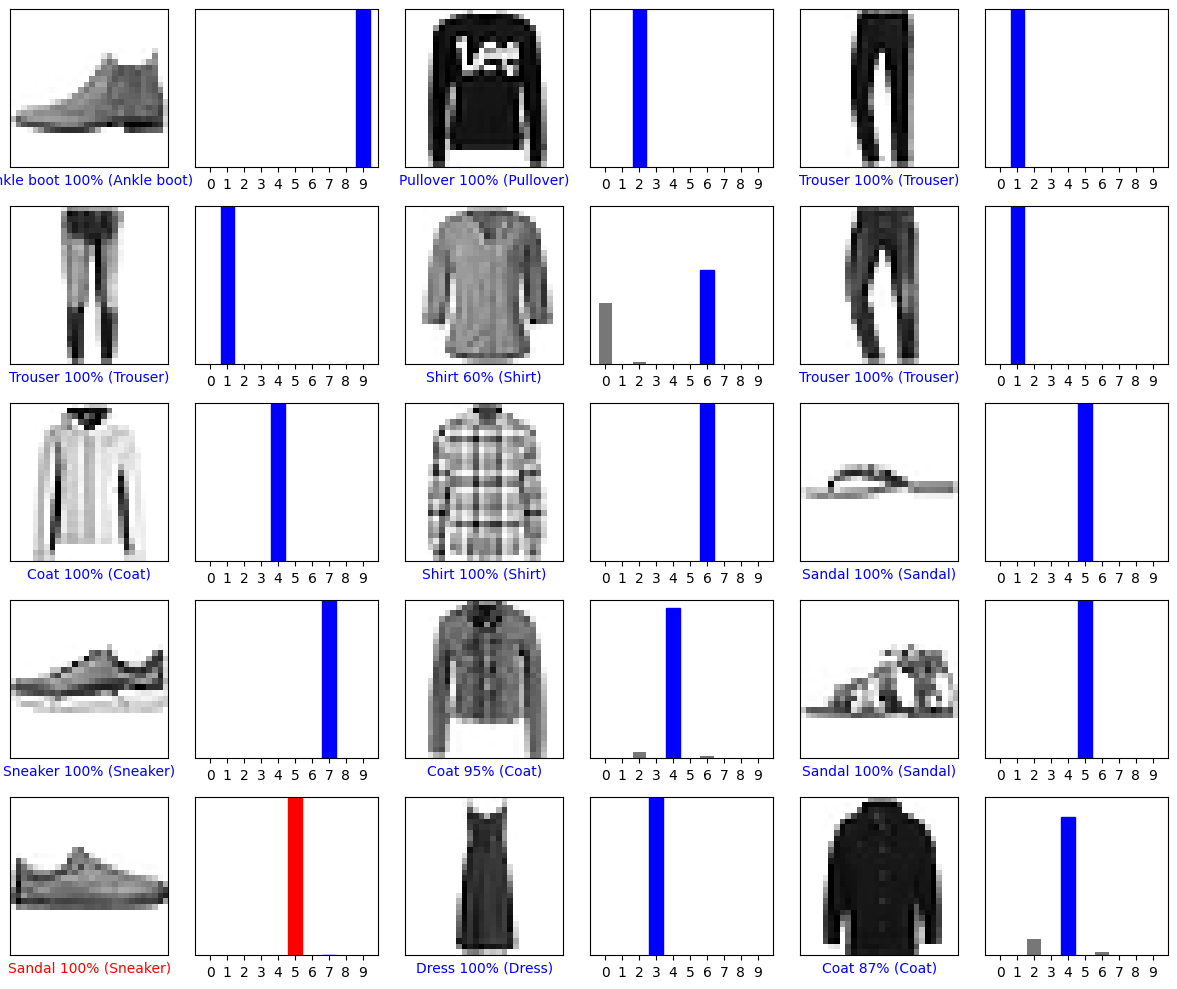

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### **Use the trained model**

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 33ms/step
[[2.0472256e-05 3.3123526e-13 9.9921370e-01 6.2245334e-14 7.2041829e-04
  7.4131770e-11 4.5368557e-05 4.8373984e-15 1.8733590e-10 2.1553704e-15]]


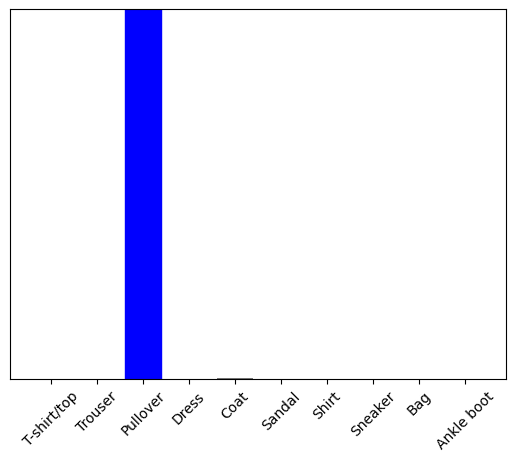

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2